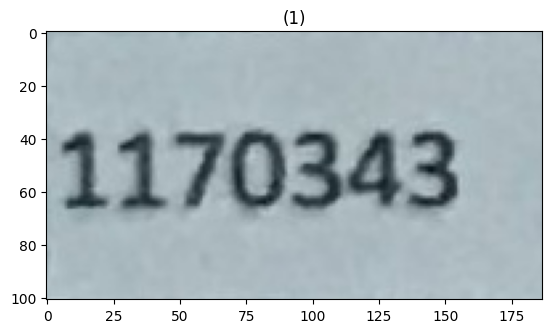

11902229


In [37]:
import cv2
import numpy as np
from commonfunctions import show_images
from getPredection import getPrediction


def segement(img):
    img = 255*img
    kernel = np.ones((5, 5), np.uint8)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(blurred, 50, 200, 255)
    
    # contours, hierarchy = cv2.findContours((edged).astype("uint8"),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr))
    white_img_large_contours = np.ones(img.shape)
    dimensions_contours = []
    for contour in contours:
        (x, y, w, h) = cv2.boundingRect(contour)
        if(w*h > 50):
            dimensions_contours.append((x, y, w, h))
            cv2.rectangle(white_img_large_contours,(x, y), (x+w, y+h), (0, 0, 255), 3)
    return dimensions_contours, img




def getIdFromImage(img):
  segmented_dimensions, filtered_img = segement(img)
  cropped_digits = []
  i = 0
  for dimension in segmented_dimensions:
    (x, y, w, h) = dimension
    cropped_digits.append(filtered_img[y-1:y+h+1, x-1:x+w+1])
    i += 1

  predictions = []

  for img in cropped_digits:
    predictions.append(getPrediction(img))

  predictedNumber = ""
  for number in predictions:
    predictedNumber += str(number)
  return predictedNumber

img = cv2.imread("../../Training/Dataset/ids/Cell_11_Test_5.jpg")
show_images([img])
print(getIdFromImage(img))

